# IMPORTAR LIBRERIAS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# 
___

# DATA SETS - LECTURA

In [2]:
df_academico = pd.read_csv("../01_data/01_raw/StudentPerformanceFactors.csv", sep=",") 
df_academico.head()

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Yes                  0           Low          Medium   
1             Yes                  2        Medium          Medium   
2             Yes                  2        Medium          Medium   
3             Yes                  1        Medium          Medium   
4             Yes                  3        Medium            High   

  School_Type Peer_Influence  Physical_Activity Learning_Disabilities  \
0      Public       Positive                  3                    No   
1      Public       Negative                  4                    No   
2      Public        Neutral                  4                    No   
3      Public       Negative                  4                    No   
4      Public        Neutral                  4                    No   

  Parental_Education_Level Distance_from_Home  Gender  Exam_Score  
0              High School               Near    Male          67  
1                  College           Moderate  Female          61  
2             Postgraduate               Near    Male          74  
3              High School           Moderate    Male          71  
4                  College               Near  Female          70

In [28]:
df_academico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [29]:
# MI FUNCION PARA CATEGORIZAR EN ALTO, MEDIO O BAJO

def categorize_exam_score(score):
    if score >= 67:
        return 1  # HIGH
#    elif score >= 65:
#        return 2  # MEDIUM
    else:
        return 0  # LOW

In [30]:
# MI FUNCION PARA CATEGORIZAR EN ALTO, MEDIO O BAJO

def categorize_quality(Involvement):
    if Involvement == "High":
        return 3  # HIGH
    elif Involvement == "Medium":
        return 2  # MEDIUM
    else:
        return 1  # LOW

In [31]:
# MI FUNCION PARA CATEGORIZAR SI O NO

def categorize_yes_no(answer):
    if answer == "No":
        return 0  # NO
    else:
        return 1  # YES

In [32]:
# MI FUNCION PARA CATEGORIZAR ESCUELA PUBLICA O PRIVADA

def categorize_school(school):
    if school == "Public":
        return 0  # NO
    else:
        return 1  # YES

In [33]:
# MI FUNCION PARA CATEGORIZAR PEER INFLUENCE

def categorize_peer_influence(Involvement):
    if Involvement == "Positive":
        return 3  # POSITIVE
    elif Involvement == "Neutral":
        return 2  # NEUTRAL
    else:
        return 1  # NEGATIVE

In [34]:
# MI FUNCION PARA CATEGORIZAR Parental_Education_Level

def categorize_Parental_Education_Level(level):
    if level == "Postgraduate":
        return 3  
    elif level == "College":
        return 2  
    else:
        return 1  

In [35]:
# MI FUNCION PARA CATEGORIZAR DISTANCIA A CASA

def categorize_home_distance(distance):
    if distance == "Far":
        return 3  
    elif distance == "Moderate":
        return 2  
    else:
        return 1  

In [36]:
# MI FUNCION PARA CATEGORIZAR HOMBRE O MUJER

def categorize_gender(gender):
    if gender == "Male":
        return 0  # male
    else:
        return 1  # female

In [37]:
df_academico['Exam_Score'] = df_academico['Exam_Score'].apply(categorize_exam_score)
df_academico['Previous_Scores'] = df_academico['Previous_Scores'].apply(categorize_exam_score)
df_academico['Parental_Involvement'] = df_academico['Parental_Involvement'].apply(categorize_quality)
df_academico['Access_to_Resources'] = df_academico['Access_to_Resources'].apply(categorize_quality)
df_academico['Extracurricular_Activities'] = df_academico['Extracurricular_Activities'].apply(categorize_yes_no)
df_academico['Motivation_Level'] = df_academico['Motivation_Level'].apply(categorize_quality)
df_academico['Internet_Access'] = df_academico['Internet_Access'].apply(categorize_yes_no)
df_academico['Family_Income'] = df_academico['Family_Income'].apply(categorize_quality)
df_academico['Teacher_Quality'] = df_academico['Teacher_Quality'].apply(categorize_quality)
df_academico['Learning_Disabilities'] = df_academico['Learning_Disabilities'].apply(categorize_yes_no)
df_academico['School_Type'] = df_academico['School_Type'].apply(categorize_school)
df_academico['Peer_Influence'] = df_academico['Peer_Influence'].apply(categorize_peer_influence)
df_academico['Parental_Education_Level'] = df_academico['Parental_Education_Level'].apply(categorize_Parental_Education_Level)
df_academico['Distance_from_Home'] = df_academico['Distance_from_Home'].apply(categorize_home_distance)
df_academico['Gender'] = df_academico['Gender'].apply(categorize_gender)

In [38]:
df_academico.head(1)

Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0             23          84                     1                    3   

   Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  \
0                           0            7                1                 1   

   Internet_Access  Tutoring_Sessions  Family_Income  Teacher_Quality  \
0                1                  0              1                2   

   School_Type  Peer_Influence  Physical_Activity  Learning_Disabilities  \
0            0               3                  3                      0   

   Parental_Education_Level  Distance_from_Home  Gender  Exam_Score  
0                         1                   1       0           1

In [39]:
df_academico.info()   # MIRA BIEN LAS LEARNING DISABILITIES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6607 non-null   int64
 1   Attendance                  6607 non-null   int64
 2   Parental_Involvement        6607 non-null   int64
 3   Access_to_Resources         6607 non-null   int64
 4   Extracurricular_Activities  6607 non-null   int64
 5   Sleep_Hours                 6607 non-null   int64
 6   Previous_Scores             6607 non-null   int64
 7   Motivation_Level            6607 non-null   int64
 8   Internet_Access             6607 non-null   int64
 9   Tutoring_Sessions           6607 non-null   int64
 10  Family_Income               6607 non-null   int64
 11  Teacher_Quality             6607 non-null   int64
 12  School_Type                 6607 non-null   int64
 13  Peer_Influence              6607 non-null   int64
 14  Physical

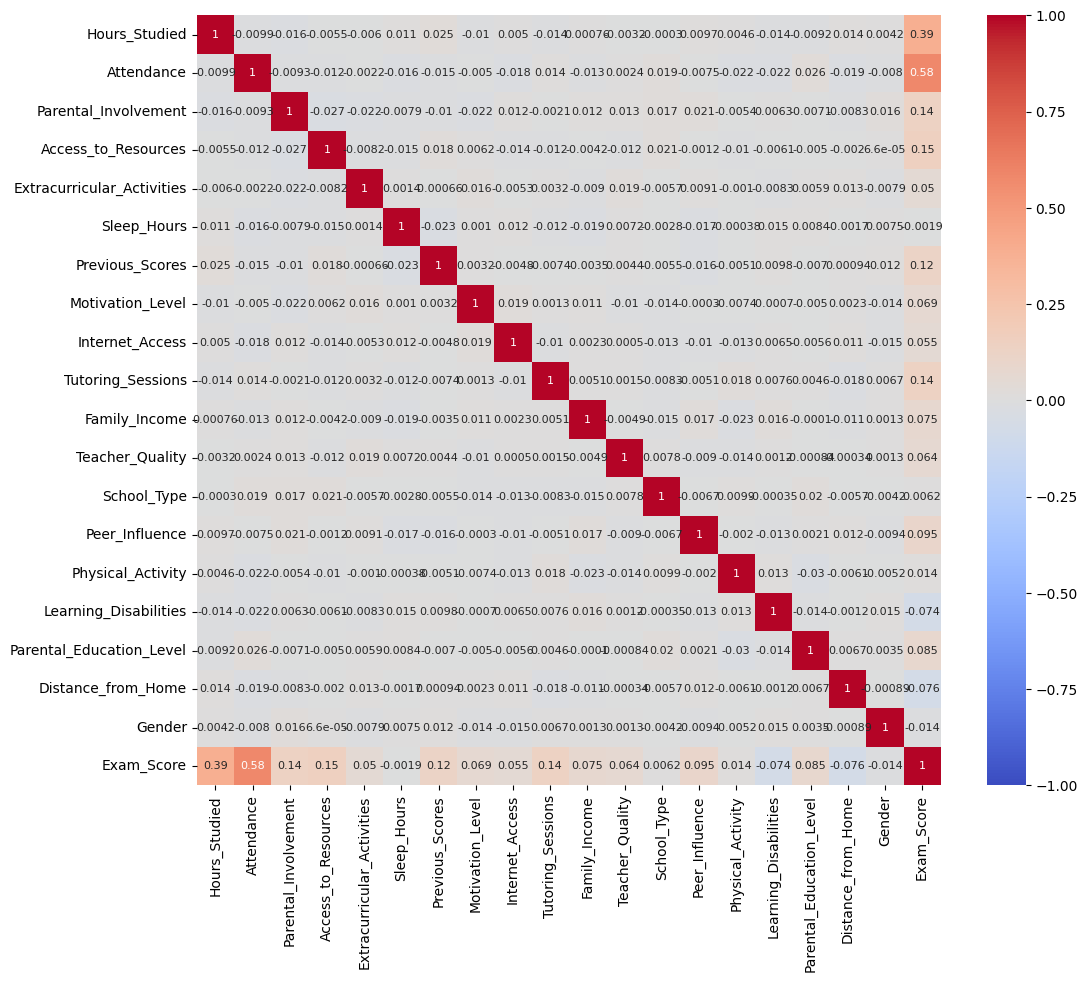

In [40]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_academico.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm", annot_kws={"size": 8})
plt.show()

In [41]:
df_academico.to_csv('ds_academico_limpio.csv', index=False)

#
___

# pruebas modelo

Evaluaci√≥n del modelo de regresi√≥n:
Mean Squared Error (MSE): 0.18
Mean Absolute Error (MAE): 0.20
R-squared (R2): 0.28


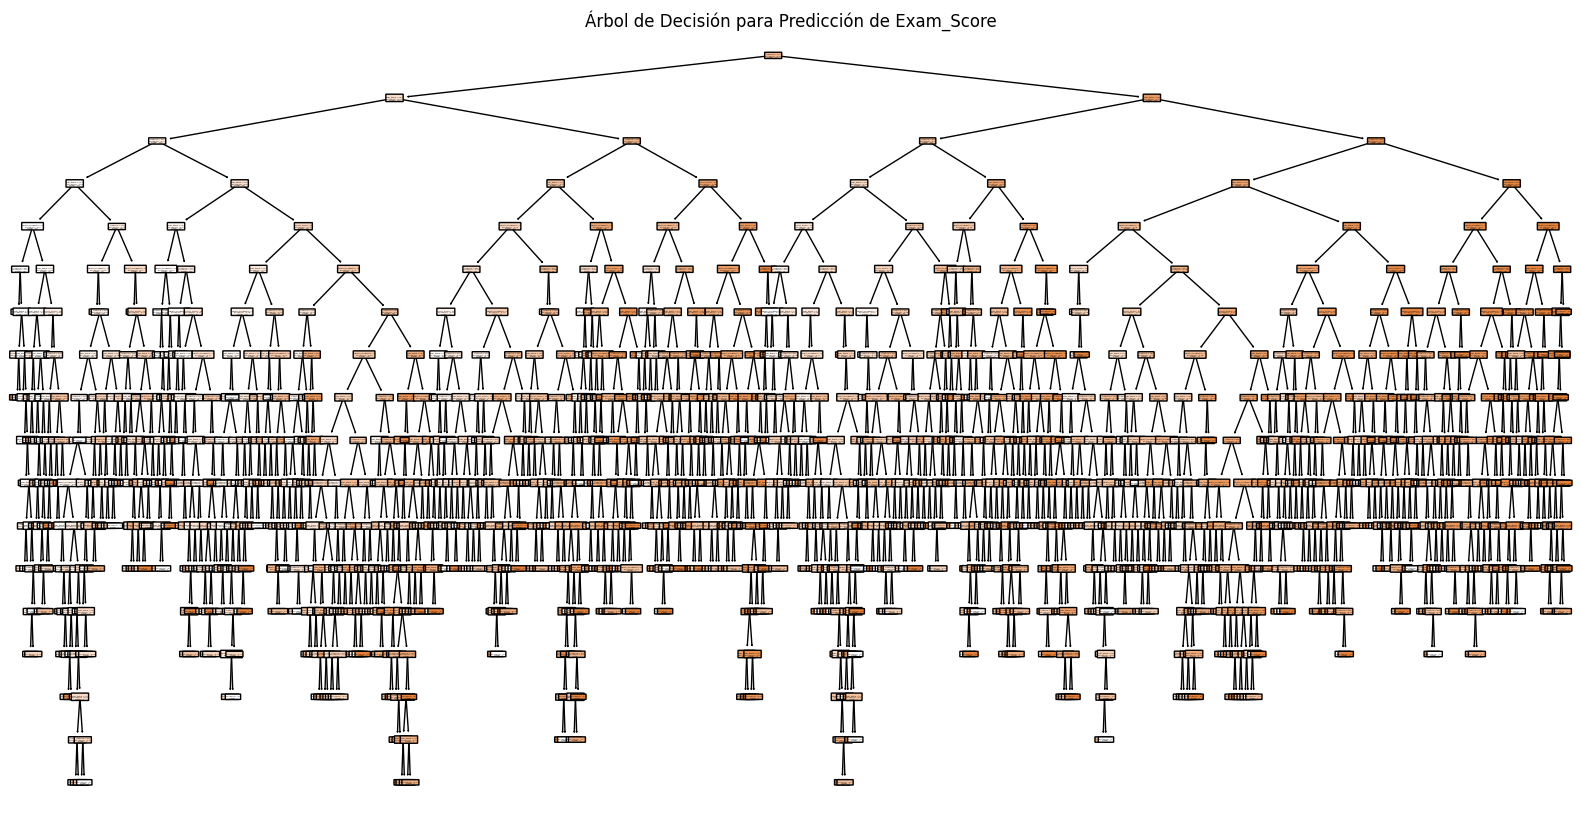

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree



# Seleccionar las variables predictoras y la variable de destino
X = df_academico[['Attendance', 'Hours_Studied', 'Previous_Scores', 'Parental_Involvement']]  # Agrega m√°s variables relevantes si lo deseas
y = df_academico['Exam_Score']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de regresi√≥n de √°rbol de decisi√≥n
model = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluaci√≥n del modelo de regresi√≥n:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Visualizaci√≥n opcional del √°rbol de decisi√≥n
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.title("√Årbol de Decisi√≥n para Predicci√≥n de Exam_Score")
plt.show()


Evaluaci√≥n del √Årbol de Decisi√≥n:
Mean Squared Error (MSE): 0.12
Mean Absolute Error (MAE): 0.24
R-squared (R2): 0.51


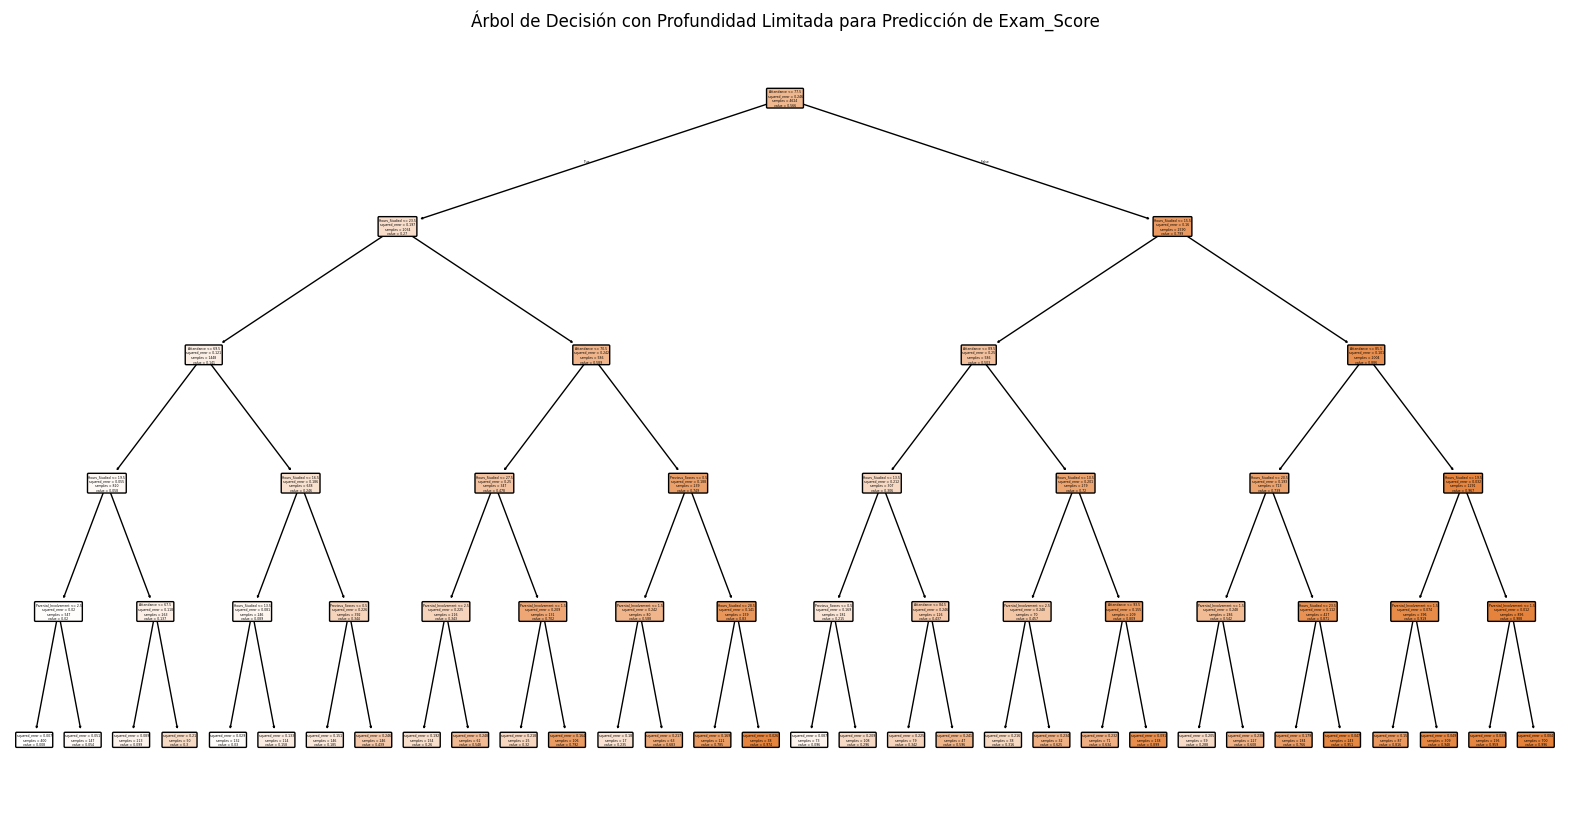


Evaluaci√≥n del Random Forest:
Mean Squared Error (MSE): 0.11
Mean Absolute Error (MAE): 0.23
R-squared (R2): 0.56

Validaci√≥n Cruzada del Random Forest (R2 scores):
[0.52906558 0.55801408 0.57921187 0.59178622 0.55640407]
R2 Promedio de Validaci√≥n Cruzada: 0.56


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree



# Seleccionar las variables predictoras y la variable de destino
X = df_academico[['Attendance', 'Hours_Studied', 'Previous_Scores', 'Parental_Involvement']]  # Agrega m√°s variables relevantes si lo deseas
y = df_academico['Exam_Score']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Modelo 1: √Årbol de Decisi√≥n con Profundidad Limitada ###

# Crear el modelo de √°rbol de decisi√≥n con restricciones de profundidad
tree_model = DecisionTreeRegressor(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5)

# Entrenar el modelo
tree_model.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo de √°rbol de decisi√≥n
y_pred_tree = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, y_pred_tree)
tree_mae = mean_absolute_error(y_test, y_pred_tree)
tree_r2 = r2_score(y_test, y_pred_tree)

print("Evaluaci√≥n del √Årbol de Decisi√≥n:")
print(f"Mean Squared Error (MSE): {tree_mse:.2f}")
print(f"Mean Absolute Error (MAE): {tree_mae:.2f}")
print(f"R-squared (R2): {tree_r2:.2f}")

# Visualizaci√≥n del √Årbol de Decisi√≥n (opcional)
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X.columns, filled=True, rounded=True)
plt.title("√Årbol de Decisi√≥n con Profundidad Limitada para Predicci√≥n de Exam_Score")
plt.show()

### Modelo 2: Random Forest ###

# Crear el modelo Random Forest con una profundidad m√°xima y m√°s √°rboles
rf_model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=5)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo Random Forest
y_pred_rf = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("\nEvaluaci√≥n del Random Forest:")
print(f"Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"R-squared (R2): {rf_r2:.2f}")

# Validaci√≥n Cruzada para evaluar la estabilidad del modelo Random Forest
cross_val_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print("\nValidaci√≥n Cruzada del Random Forest (R2 scores):")
print(cross_val_scores)
print(f"R2 Promedio de Validaci√≥n Cruzada: {cross_val_scores.mean():.2f}")


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor



# Seleccionar las variables predictoras y la variable de destino
X = df_academico[['Attendance', 'Hours_Studied', 'Previous_Scores', 'Parental_Involvement']]  # Agrega m√°s variables si es necesario
y = df_academico['Exam_Score']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Modelo 1: Gradient Boosting ###

# Crear el modelo de Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100, max_depth=3)

# Entrenar el modelo
gb_model.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo de Gradient Boosting
y_pred_gb = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_mae = mean_absolute_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)

print("Evaluaci√≥n del Gradient Boosting:")
print(f"Mean Squared Error (MSE): {gb_mse:.2f}")
print(f"Mean Absolute Error (MAE): {gb_mae:.2f}")
print(f"R-squared (R2): {gb_r2:.2f}")

# Validaci√≥n cruzada para Gradient Boosting
cross_val_scores_gb = cross_val_score(gb_model, X, y, cv=5, scoring='r2')
print("\nValidaci√≥n Cruzada del Gradient Boosting (R2 scores):")
print(cross_val_scores_gb)
print(f"R2 Promedio de Validaci√≥n Cruzada: {cross_val_scores_gb.mean():.2f}")

### Modelo 2: XGBoost ###

# Crear el modelo XGBoost
xgb_model = XGBRegressor(random_state=42, n_estimators=100, max_depth=3, learning_rate=0.1)

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo de XGBoost
y_pred_xgb = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_r2 = r2_score(y_test, y_pred_xgb)

print("\nEvaluaci√≥n del XGBoost:")
print(f"Mean Squared Error (MSE): {xgb_mse:.2f}")
print(f"Mean Absolute Error (MAE): {xgb_mae:.2f}")
print(f"R-squared (R2): {xgb_r2:.2f}")

# Validaci√≥n cruzada para XGBoost
cross_val_scores_xgb = cross_val_score(xgb_model, X, y, cv=5, scoring='r2')
print("\nValidaci√≥n Cruzada del XGBoost (R2 scores):")
print(cross_val_scores_xgb)
print(f"R2 Promedio de Validaci√≥n Cruzada: {cross_val_scores_xgb.mean():.2f}")


Evaluaci√≥n del Gradient Boosting:
Mean Squared Error (MSE): 0.10
Mean Absolute Error (MAE): 0.22
R-squared (R2): 0.59

Validaci√≥n Cruzada del Gradient Boosting (R2 scores):
[0.5436764  0.57529495 0.60287285 0.61087326 0.58241963]
R2 Promedio de Validaci√≥n Cruzada: 0.58

Evaluaci√≥n del XGBoost:
Mean Squared Error (MSE): 0.10
Mean Absolute Error (MAE): 0.22
R-squared (R2): 0.59

Validaci√≥n Cruzada del XGBoost (R2 scores):
[0.54664814 0.57569957 0.60088736 0.61145091 0.58174586]
R2 Promedio de Validaci√≥n Cruzada: 0.58


#
___

# CORRELACION ANALISIS

## üìä Observaciones Clave en el Rendimiento Acad√©mico de Estudiantes

---

### 1. üìö Relaci√≥n entre **Horas de Estudio (Hours_Studied)** y **Calificaci√≥n en Examen (Exam_Score)**
- **Correlaci√≥n**: 0.39
- **Interpretaci√≥n**: Los estudiantes que dedican m√°s horas al estudio tienden a obtener mejores calificaciones en los ex√°menes. Este factor tiene una influencia positiva moderada en el rendimiento acad√©mico. üìà

---

### 2. üè´ **Asistencia (Attendance)** y **Calificaci√≥n en Examen (Exam_Score)**
- **Correlaci√≥n**: 0.58
- **Interpretaci√≥n**: La asistencia tiene una correlaci√≥n positiva fuerte con las calificaciones en los ex√°menes. Esto sugiere que los estudiantes que asisten regularmente a clase tienden a tener un mejor rendimiento acad√©mico. ‚úÖ

---

### 3. üë®‚Äçüë©‚Äçüëß **Participaci√≥n de los Padres (Parental_Involvement)** y **Calificaci√≥n en Examen (Exam_Score)**
- **Correlaci√≥n**: 0.41
- **Interpretaci√≥n**: El involucramiento de los padres tiene una relaci√≥n positiva moderada con las calificaciones. Esto sugiere que los estudiantes cuyos padres est√°n m√°s involucrados en su educaci√≥n tienden a rendir mejor en los ex√°menes. üè†

---

### 4. üåê **Acceso a Recursos (Access_to_Resources)** y **Calificaci√≥n en Examen (Exam_Score)**
- **Correlaci√≥n**: 0.14
- **Interpretaci√≥n**: Aunque la correlaci√≥n es baja, el acceso a recursos (como material educativo o apoyo escolar) tiene una relaci√≥n positiva con las calificaciones, lo cual puede ser beneficioso para el aprendizaje. üìñ

---

### 5. üåô **Horas de Sue√±o (Sleep_Hours)** y **Calificaci√≥n en Examen (Exam_Score)**
- **Correlaci√≥n**: 0.11
- **Interpretaci√≥n**: La correlaci√≥n es baja, pero sugiere que tener una cantidad adecuada de horas de sue√±o puede tener un impacto positivo leve en el rendimiento acad√©mico. üò¥

---

### 6. üìù **Puntajes Previos (Previous_Scores)** y **Calificaci√≥n en Examen (Exam_Score)**
- **Correlaci√≥n**: 0.12
- **Interpretaci√≥n**: Los puntajes previos de los estudiantes tienen una leve relaci√≥n positiva con los puntajes actuales, lo cual puede indicar consistencia en el rendimiento acad√©mico. üìà

---

### 7. üíª **Acceso a Internet (Internet_Access)** y **Calificaci√≥n en Examen (Exam_Score)**
- **Correlaci√≥n**: 0.05
- **Interpretaci√≥n**: Aunque esta correlaci√≥n es baja, el acceso a internet podr√≠a ser un recurso adicional para los estudiantes, aunque no es un factor determinante en el rendimiento acad√©mico. üåê

---

### 8. üë©‚Äçüè´ **Calidad del Profesor (Teacher_Quality)** y **Calificaci√≥n en Examen (Exam_Score)**
- **Correlaci√≥n**: 0.06
- **Interpretaci√≥n**: La calidad del profesor tiene una correlaci√≥n muy leve con el rendimiento en los ex√°menes, lo cual sugiere que este factor podr√≠a no ser decisivo en este contexto espec√≠fico. üë®‚Äçüè´

---

### 9. üèãÔ∏è **Actividad F√≠sica (Physical_Activity)** y **Calificaci√≥n en Examen (Exam_Score)**
- **Correlaci√≥n**: -0.06
- **Interpretaci√≥n**: La actividad f√≠sica muestra una correlaci√≥n negativa muy d√©bil con el rendimiento acad√©mico, indicando que puede no tener una influencia significativa en las calificaciones. ‚öΩÔ∏è

---

### 10. üë®‚Äçüë©‚Äçüéì **Nivel de Educaci√≥n de los Padres (Parental_Education_Level)** y **Calificaci√≥n en Examen (Exam_Score)**
- **Correlaci√≥n**: 0.09
- **Interpretaci√≥n**: El nivel educativo de los padres tiene una correlaci√≥n leve con las calificaciones en los ex√°menes, lo cual sugiere que el contexto educativo en el hogar puede influir, aunque no es determinante. üéì

---

## üìå Resumen General
- **Factores que muestran correlaciones positivas con las calificaciones en ex√°menes**:
  - üìö **Horas de Estudio**
  - üè´ **Asistencia**
  - üë®‚Äçüë©‚Äçüëß **Participaci√≥n de los Padres**
  - üè† **Acceso a Recursos**
  - üéì **Nivel de Educaci√≥n de los Padres**

- **Factores con correlaci√≥n negativa d√©bil o muy baja**:
  - üèãÔ∏è **Actividad F√≠sica**
  - üåê **Acceso a Internet**
  - üò¥ **Horas de Sue√±o**

## üìù Conclusi√≥n
En t√©rminos generales, los factores m√°s influyentes en el rendimiento acad√©mico de los estudiantes en este conjunto de datos son:

- **Asistencia**: Los estudiantes con mejor asistencia tienden a obtener mejores resultados. ‚úÖ
- **Participaci√≥n de los Padres**: Los estudiantes cuyos padres est√°n involucrados en su educaci√≥n tienden a tener un mejor rendimiento acad√©mico. üè†
- **Horas de Estudio**: Dedicar m√°s tiempo al estudio est√° relacionado con mejores calificaciones en los ex√°menes. üìö

Factores como **actividad f√≠sica** y **acceso a internet** no parecen tener una relaci√≥n significativa con las calificaciones en este contexto. üõë
